In [1]:
#Import Library Scikit Learn untuk Decision Tree,Dataset & Matlotlib
import numpy as np
import pandas as pd

#1.0.1 import required libraries for visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

#1.0.2 import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

#1.0.3 import required libraries for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'
    
my_colors = ["#517664", "#73AA90", "#94DDBC", "#DAB06C", 
             "#DF928E", "#C97973", "#B25F57"]
CMAP1 = ListedColormap(my_colors)

## Insert Dataset


In [2]:
mdata=pd.read_csv("Price Range Phone Dataset.csv")

## DATA EXPLORATORY & CLEANING⚒


In [3]:
#Displaying the data types
mdata.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
##Displaying the table data
mdata.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Displaying dimensions 
mdata.shape

(2000, 21)

In [6]:
#Displaying descriptive statistics of DataFrame
desdata=mdata.iloc[:,:-1] #Rmoving price_range feature since it is a categorical
desdata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [7]:
#Displaying descriptive statistics of DataFrame
desdata=mdata.iloc[:,:-1] #Rmoving price_range feature since it is a categorical
desdata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
# Calculating the Missing Values

df_null = mdata.isnull().sum()
df_null

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
# Checking rows having NaN values

mdata.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## FEATURE ENGINEERING


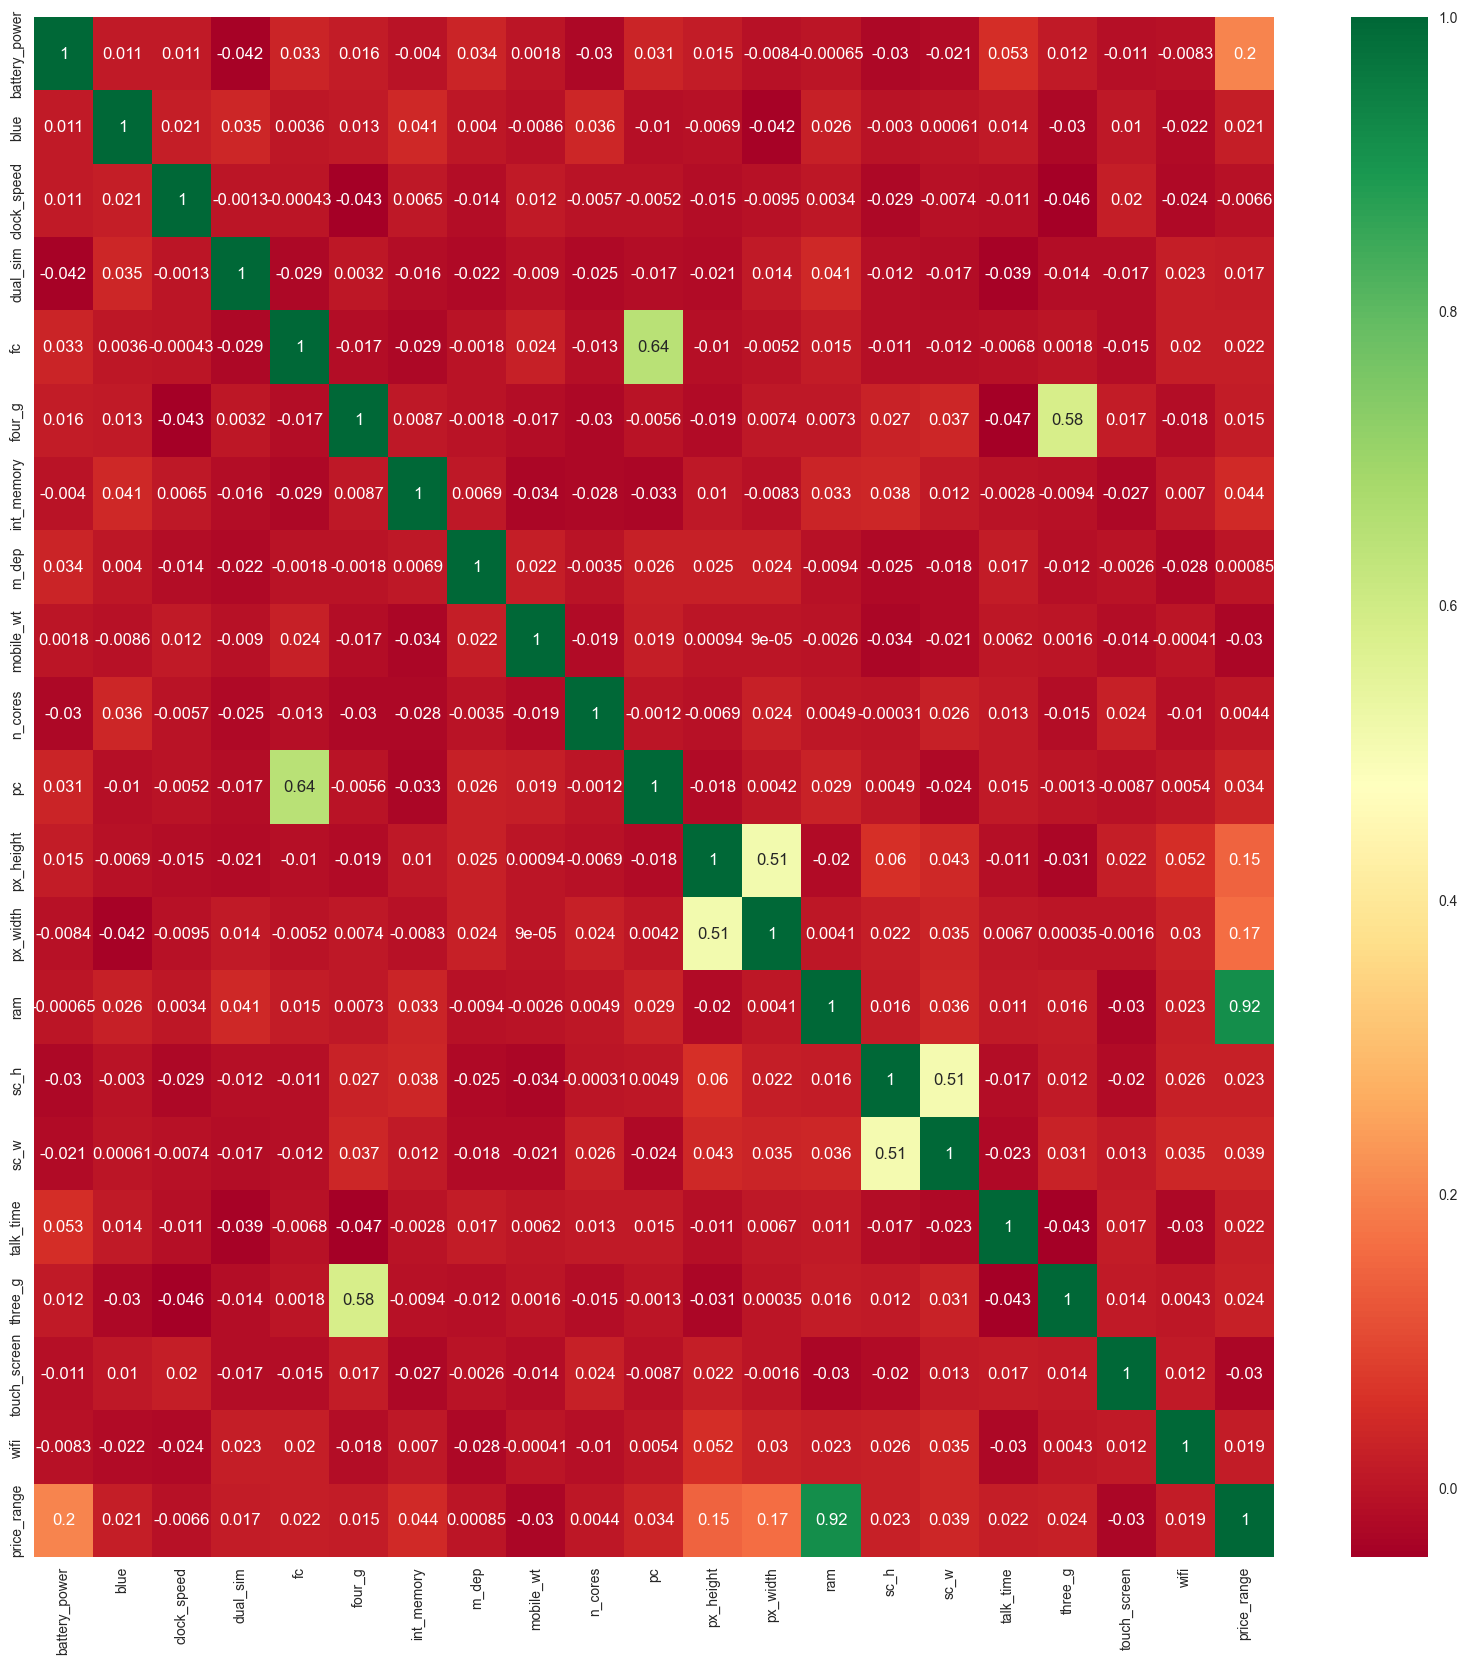

In [11]:
#korelasi menggunakan heatmap
korelasi = mdata.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heatmap 1
g=sns.heatmap(mdata[features].corr(),annot=True,cmap="RdYlGn")

## Data visualization

### How does ram effects Price_range?

In [12]:
#2.0.0 ramsize with price_range
g = sn.FacetGrid(mdata,col="price_range", hue="price_range", palette="Set1",height=5)
g.map(sn.histplot, 'ram');
g.add_legend();

NameError: name 'sn' is not defined

### How does internal memory, Battery_power effect Price_range?

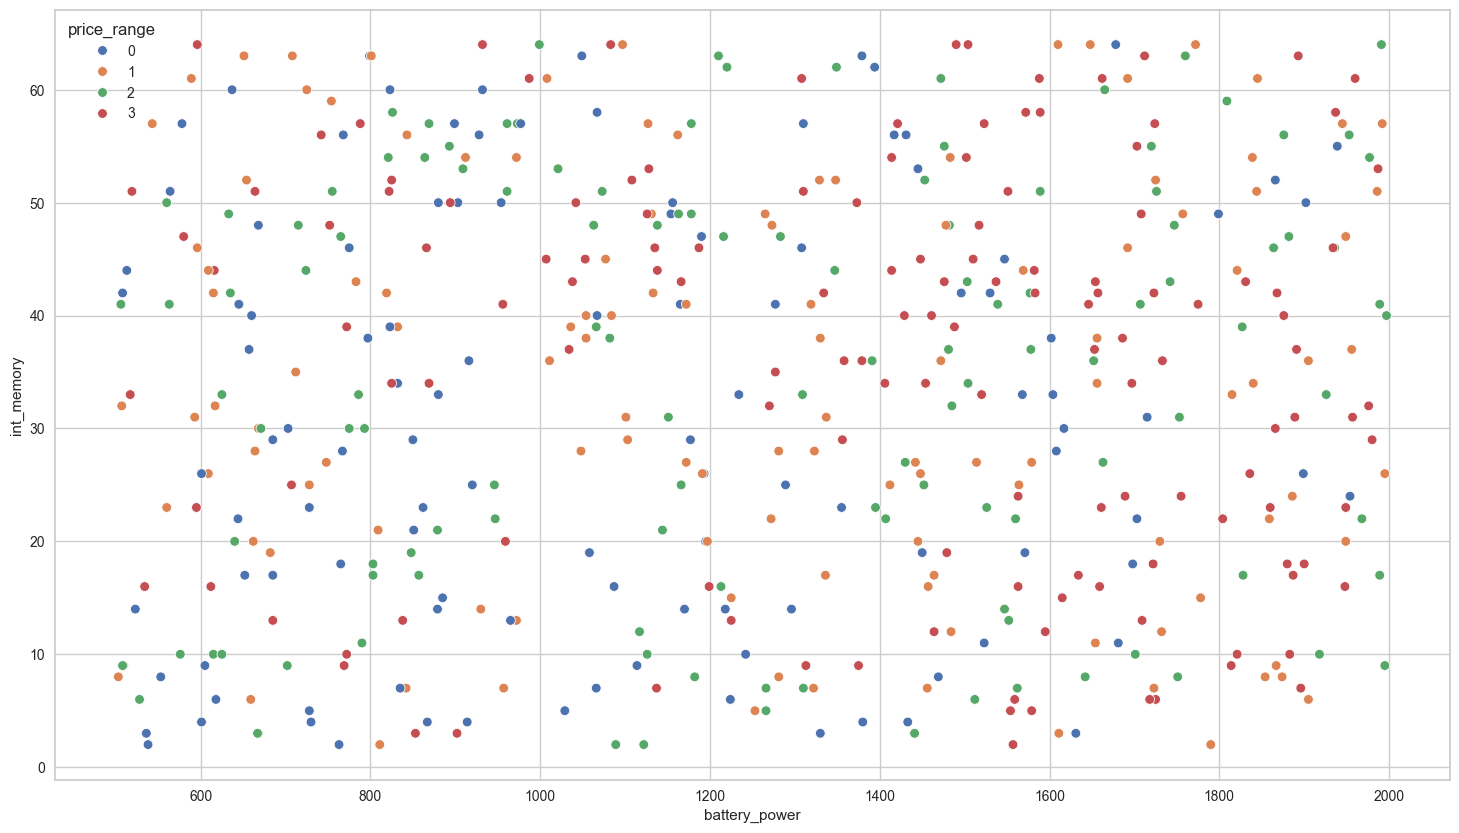

In [ ]:
#2.0.1 grouping int_memory power with price_range
plt.figure(figsize=(18,10))
sn.scatterplot(data=mdata[:500], x="battery_power", y="int_memory", hue="price_range",palette="deep");

### How does sim type and RAM effects Price_range?

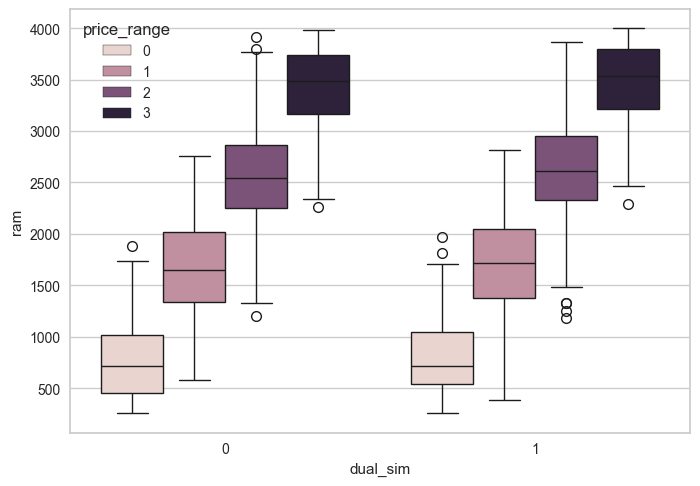

In [ ]:
#2.0.2 analysing RAM , sim type with price_range
sn.boxplot(data=mdata, x=mdata['dual_sim'], y=mdata['ram'], hue=mdata['price_range']);

### How does Battery_power and n_cores reletion?


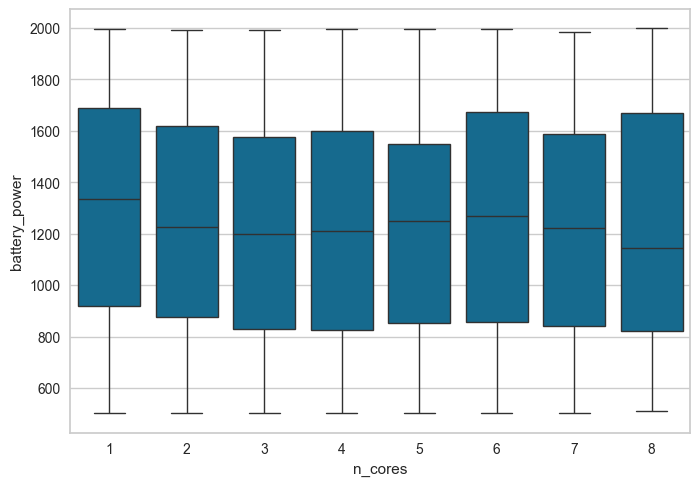

In [ ]:
sn.boxplot(data=mdata, x=mdata['n_cores'], y=mdata['battery_power']);

###  How does sc_w and sc_h effect price_range?

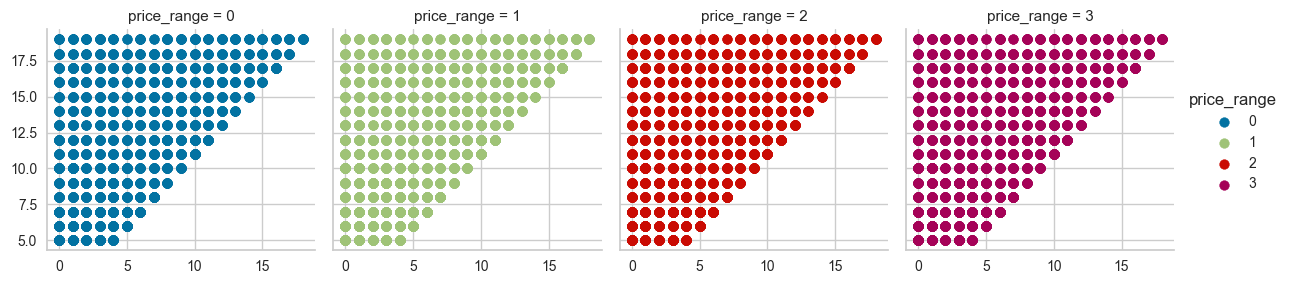

In [ ]:
#3.0.0 Analysing talk_time values with price_range
g=sn.FacetGrid(mdata, col= "price_range", hue="price_range")
g.map(plt.scatter,x=mdata['sc_w'], y=mdata['sc_h']);
g.add_legend();

### Touch screen and dual_sim with price range

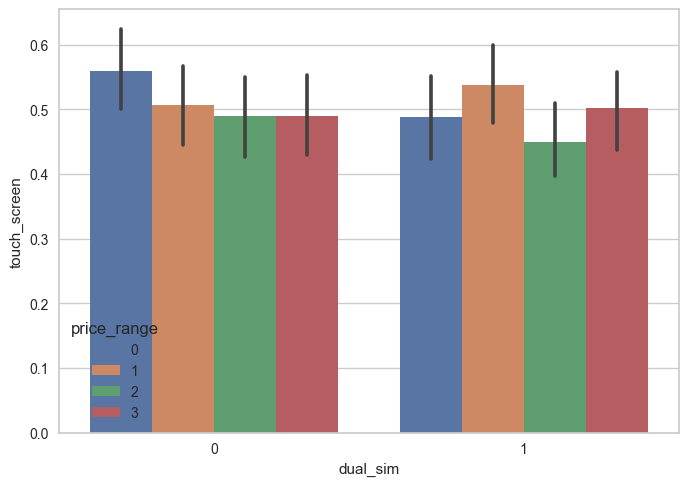

In [ ]:
#3.0.1 Checking touch_screen feature with price_range

sn.barplot(data=mdata,x=mdata['dual_sim'], y=mdata['touch_screen'], hue="price_range",palette="deep");

###  How does price_range varies with primary camera and front camera?


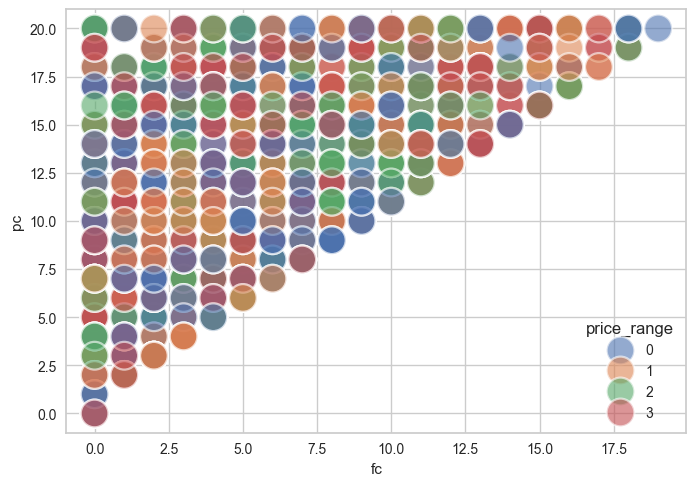

In [ ]:
#3.0.3 Analysing primary camera with price_range
sn.scatterplot(data=mdata,x=mdata['fc'], y=mdata['pc'], hue="price_range",alpha = 0.6, s = 400,palette="deep");

### dual_sim and ram VS price_range

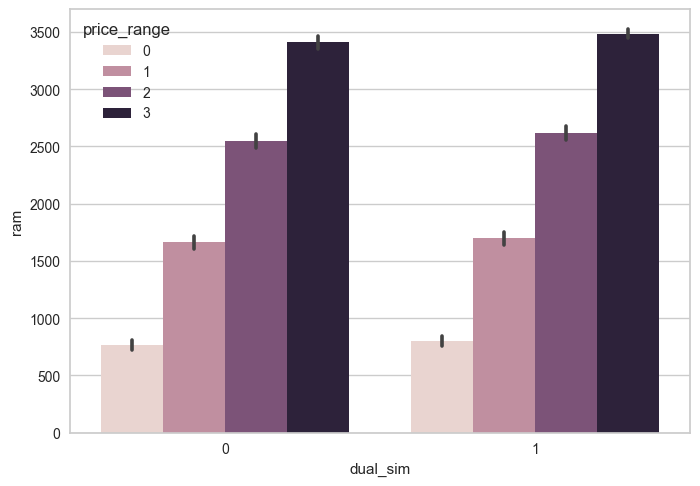

In [ ]:
#4.0.0 Checking dual_sim feature with price_range diffrences
sn.barplot(data=mdata, x="dual_sim", y="ram", hue="price_range");

### Number of phone has dual_sim

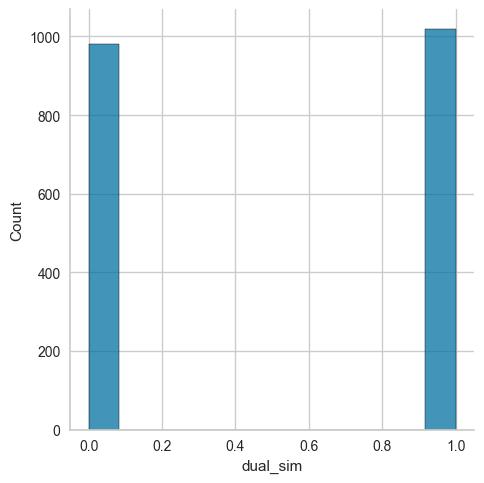

In [ ]:
#4.0.1 number of dual_sim feature phones
sn.displot(mdata['dual_sim']);

### How does ram, mobile_wt feature chang Price_range?


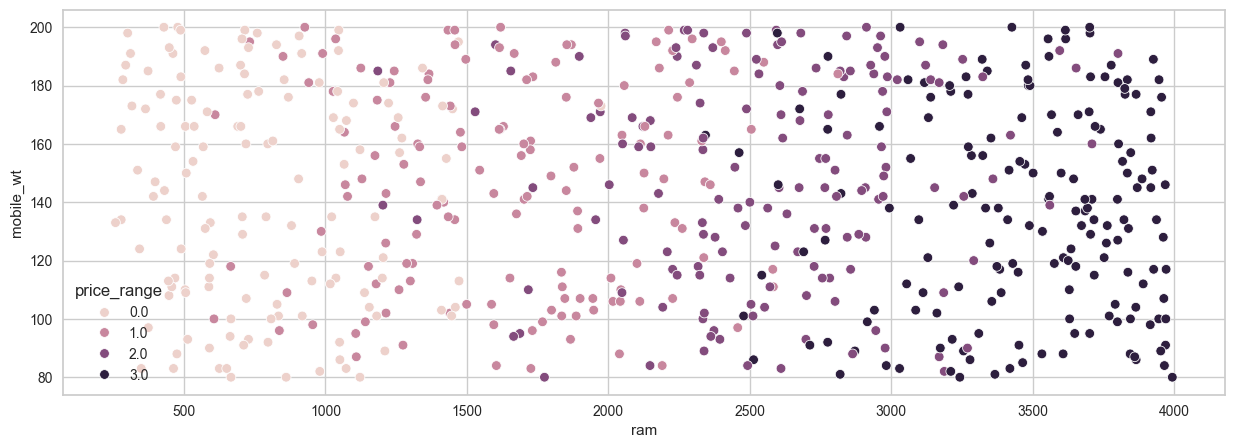

In [ ]:
#4.0.1 Showing diffrence price_range with wifi
plt.figure(figsize=(15,5))
sn.scatterplot(data=mdata[:600], x=mdata['ram'], y=mdata['mobile_wt'], hue="price_range");

### 3G supported phone,4G phone and price_range

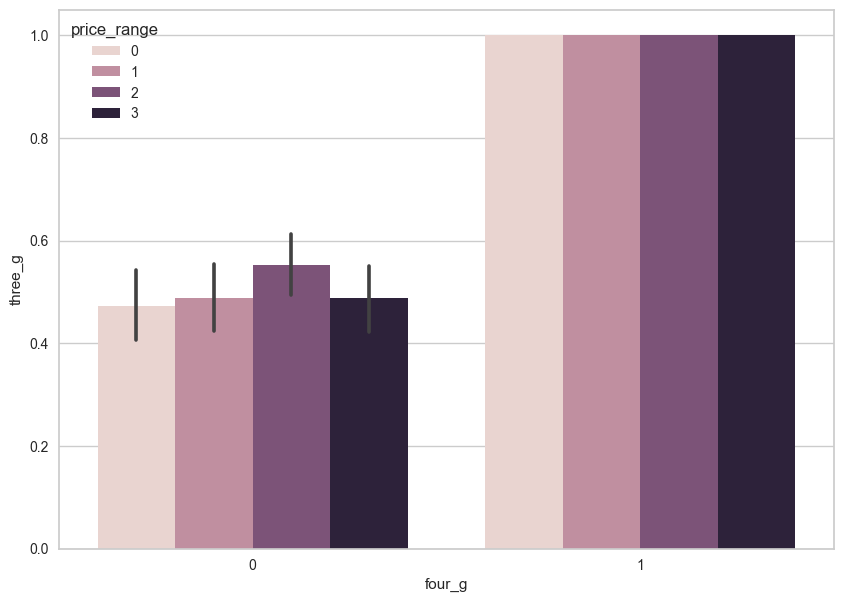

In [ ]:
#4.0.1 Checking 3G supported phone with price_range
plt.figure(figsize=(10,7))
sn.barplot(data=mdata, x=mdata['four_g'], y=mdata['three_g'], hue="price_range");

## Clustering & Modeling

In [ ]:
#5.0.0 Clustering data preparation 
X=mdata.drop('price_range', axis=1)
y=mdata['price_range']
X.shape

(2000, 20)

### Scaling the data using Standardisation

In [ ]:
#1.0.0 instantiate 
scaler=StandardScaler()
#1.0.1 fit_transform 
mdata_scaled = scaler.fit_transform(X)
mdata_scaled.shape

(2000, 20)

## Classification & Modeling

In [ ]:
#7.0.0 Preparing the classification data
X=mdata.iloc[:, 1:-1].values
y=mdata.iloc[:,-1]

In [ ]:
#7.0.0 instantiate object
ss=StandardScaler()
#7.0.1 Train object on data
ss.fit(X)
#7.0.1 Transform data
X=ss.transform(X)

In [ ]:
#8.0.0 Split X and y into train and test data:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=20)

## Explore the testsplit data result:


In [ ]:
#8.0.1 dimensions of X train data
X_train.shape

(1600, 19)

In [ ]:
#8.0.2 dimensions of x test data
X_test.shape

(400, 19)

In [ ]:
#8.0.3 Displaying x train data
X_train

array([[-0.9900495 , -1.00790612,  0.98117712, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.0100505 ,  0.21788424, -1.01918398, ...,  0.55964063,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       ...,
       [-0.9900495 ,  0.70820038,  0.98117712, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.9900495 , -0.76274805, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
         0.99401789, -1.01409939]])

In [ ]:
#8.0.4 Displaying of y train data
y_train

1500    2
451     1
1627    3
669     1
1567    1
       ..
924     2
1247    1
271     0
474     2
1379    1
Name: price_range, Length: 1600, dtype: int64

In [ ]:
#8.0.5 Showing of y test data
y_test

1556    3
1560    2
1559    2
1594    1
906     3
       ..
959     3
1939    2
668     3
534     2
1111    3
Name: price_range, Length: 400, dtype: int64

In [ ]:
print(clr.S+"Label values is :"+clr.E,mdata['price_range'].unique() )

Label values is : [1 2 3 0]


## Step EDA


<Axes: xlabel='price_range', ylabel='count'>

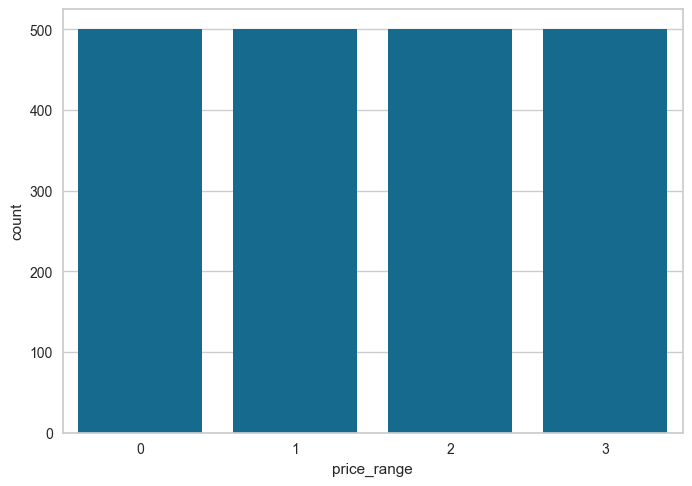

In [ ]:
sns.countplot(x='price_range',data=mdata)

In [ ]:
mdata.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: xlabel='n_cores', ylabel='count'>

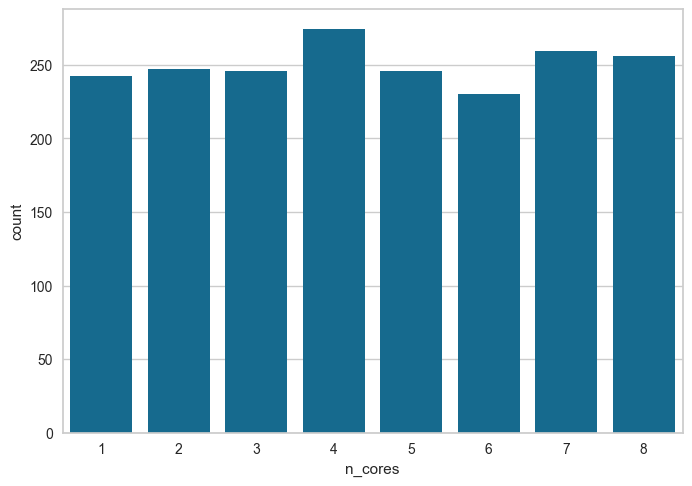

In [ ]:
sns.countplot(x='n_cores', data=mdata)

<Axes: xlabel='four_g', ylabel='count'>

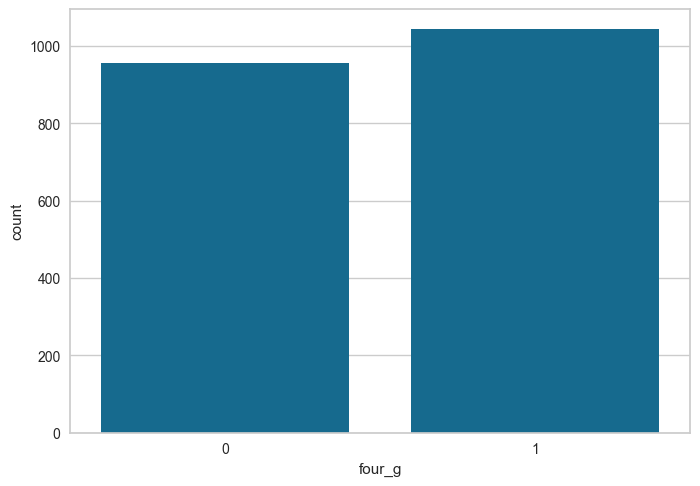

In [ ]:
sns.countplot(x='four_g', data=mdata)

<Axes: xlabel='dual_sim', ylabel='count'>

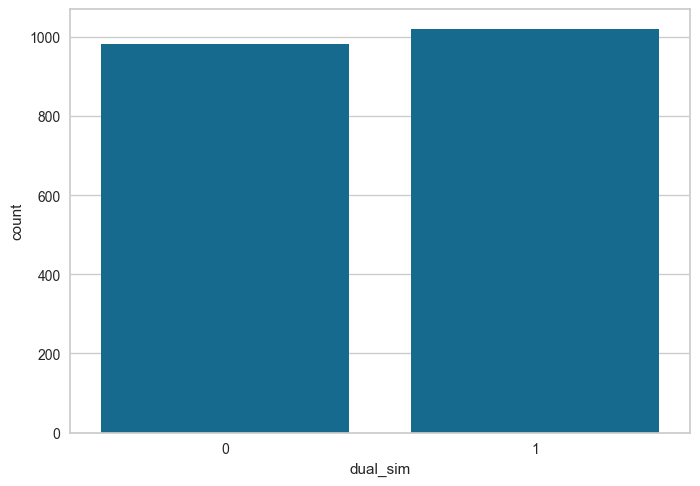

In [ ]:
sns.countplot(x='dual_sim', data=mdata)

<Axes: xlabel='touch_screen', ylabel='count'>

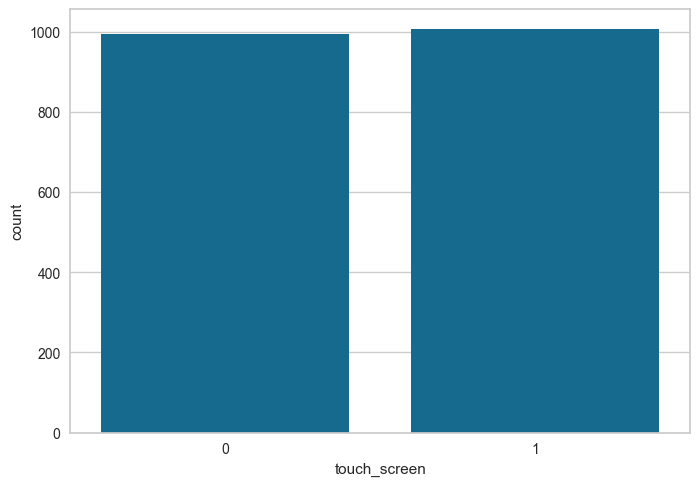

In [ ]:
sns.countplot(x='touch_screen', data=mdata)

<Axes: xlabel='wifi', ylabel='count'>

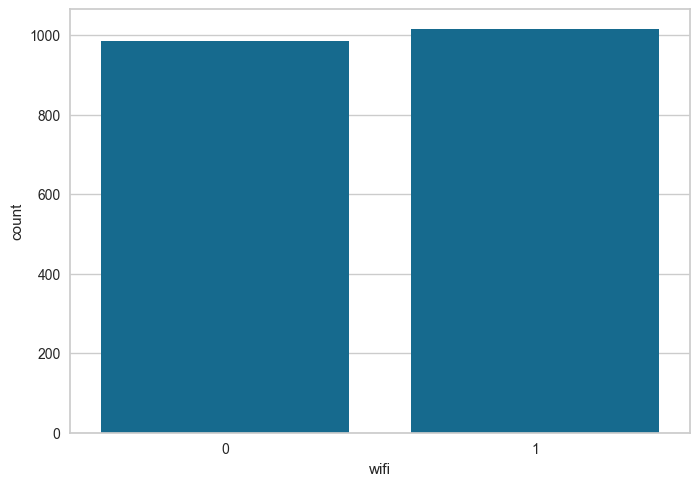

In [ ]:
sns.countplot(x='wifi', data=mdata)

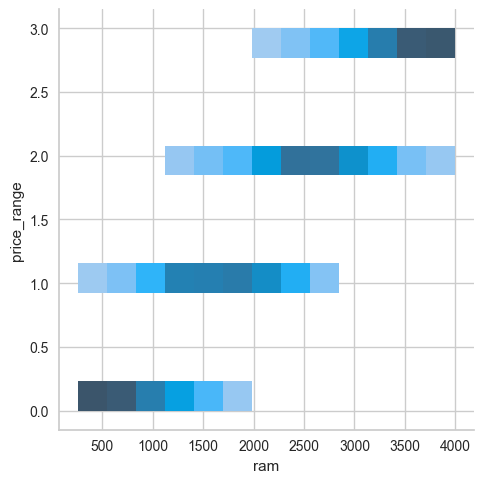

In [ ]:
sns.displot(x='ram',y='price_range',data=mdata)

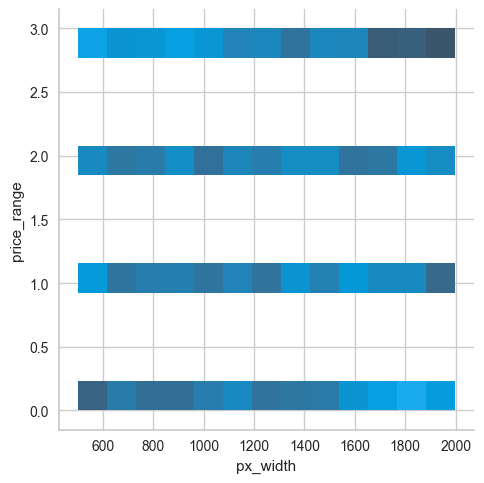

In [ ]:
sns.displot(x='px_width',y='price_range',data=mdata)

In [ ]:
sns.displot(x='int_memory',y='price_range',data=mdata)

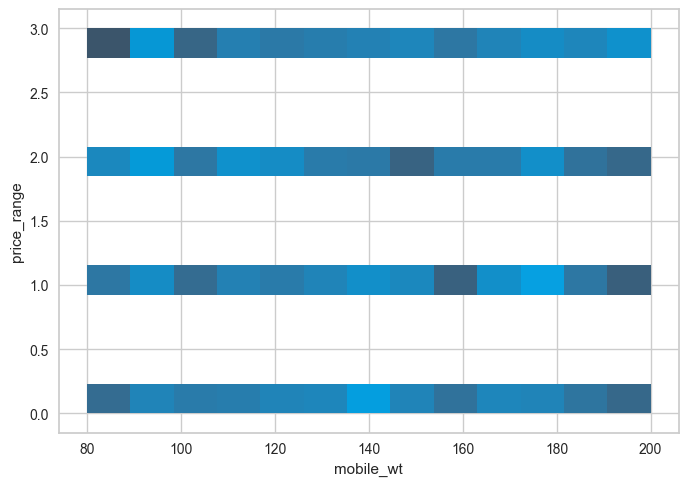

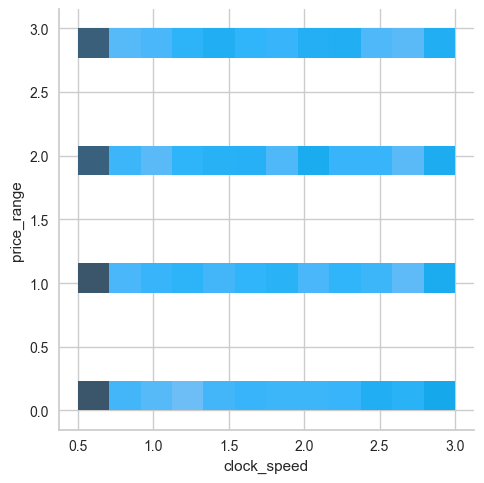

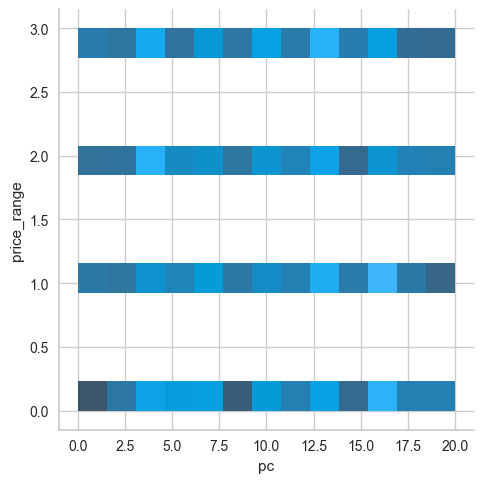

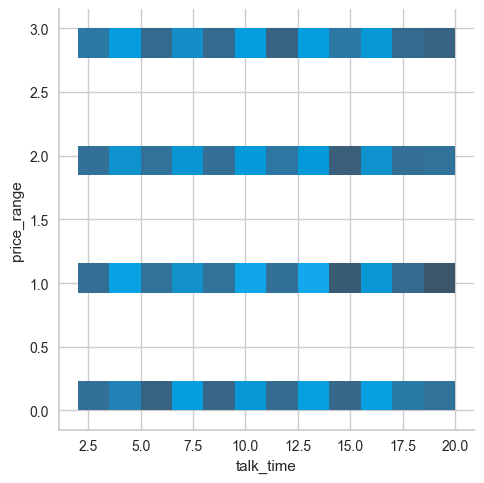

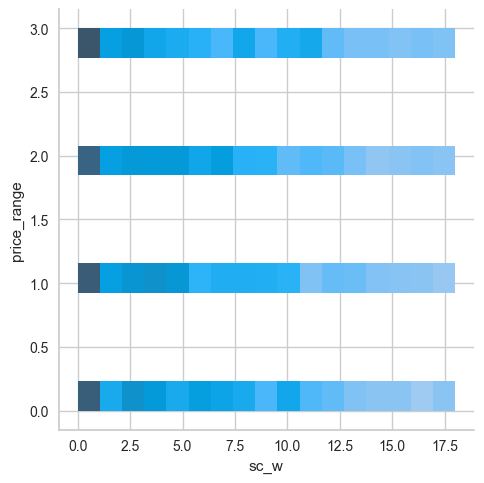

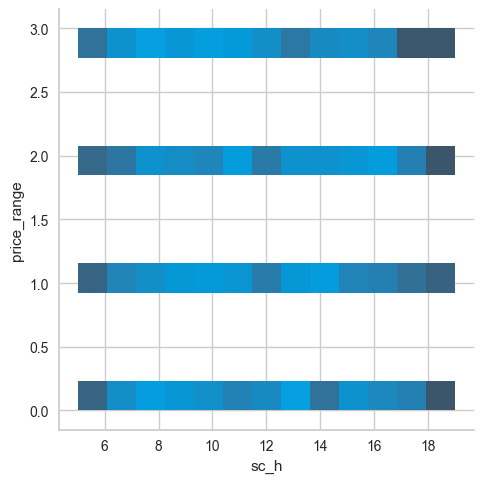

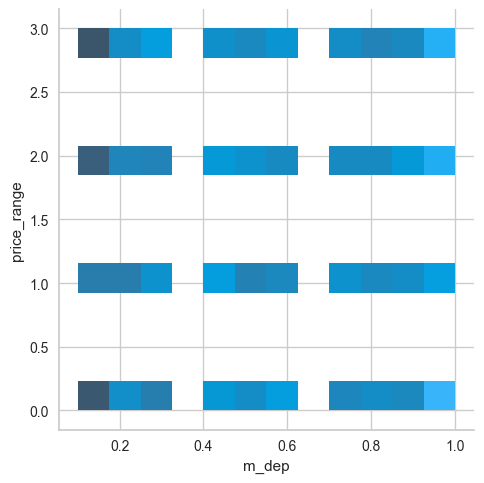

In [ ]:
sns.histplot(x='mobile_wt',y='price_range',data=mdata)
sns.displot(x='clock_speed',y='price_range',data=mdata)
sns.displot(x='pc',y='price_range',data=mdata)
sns.displot(x='talk_time',y='price_range',data=mdata)
sns.displot(x='sc_w',y='price_range',data=mdata)
sns.displot(x='sc_h',y='price_range',data=mdata)
sns.displot(x='m_dep',y='price_range',data=mdata)

## Decision tree & Modeling:


In [ ]:
#4.0.0 Start modeling
dtree=DecisionTreeClassifier(criterion="gini", max_depth=None)

In [ ]:
#4.0.1 Train our decision tree
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions

In [ ]:
# 4.0.2 Make predictions of test data
y_te = dtree.predict(X_test)
y_te

array([2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 0, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 2,
       0, 0, 3, 2, 3, 2, 2, 1, 3, 2, 0, 2, 0, 0, 3, 1, 2, 0, 1, 3, 3, 1,
       0, 2, 1, 0, 3, 0, 3, 0, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 2, 1, 0, 2,
       0, 3, 0, 1, 1, 3, 3, 0, 0, 1, 0, 0, 2, 0, 1, 0, 3, 1, 0, 0, 2, 1,
       2, 1, 3, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 3, 3, 2, 1, 1, 2, 1,
       1, 2, 3, 0, 3, 3, 3, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 3, 1, 3, 0, 2, 0, 1, 0,
       3, 3, 3, 2, 0, 2, 0, 0, 3, 3, 3, 2, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3,
       2, 2, 0, 3, 2, 1, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 2, 2, 0, 1, 3,
       2, 2, 1, 0, 0, 3, 2, 2, 2, 3, 2, 0, 3, 3, 1, 3, 0, 0, 1, 2, 2, 3,
       2, 0, 2, 2, 3, 1, 3, 2, 2, 1, 0, 1, 1, 1, 0, 3, 0, 2, 3, 0, 2, 1,
       1, 2, 3, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 3, 1, 3, 2, 0, 1, 3, 2, 1,
       1, 1, 1, 1, 1, 3, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 0, 0,
       1, 3, 2, 2, 3, 3, 3, 1, 0, 3, 0, 1, 2, 2, 3,

In [ ]:
# 4.0.3 Get accuracy

np.sum((y_test == y_te))/y_test.size 

0.7175

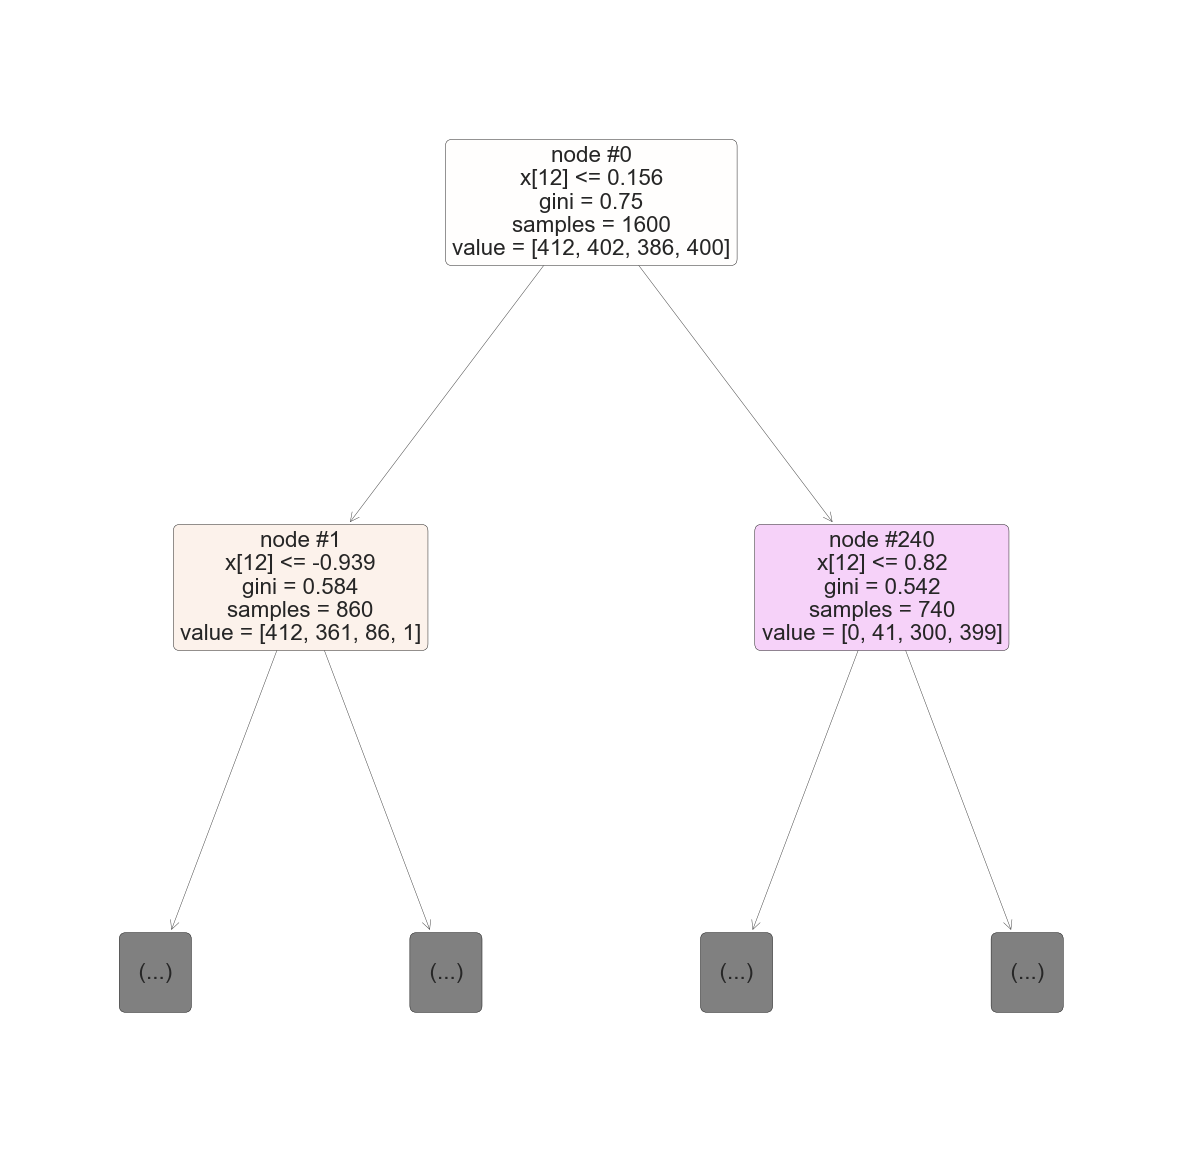

In [ ]:
#5.0.0 plot decision tree
plt.figure(figsize=(15,15))
plot_tree(dtree, max_depth = 1,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
          )
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier()

In [ ]:
import pickle

pickle.dump(DTC_model,open('DTC.pkl','wb'))